In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\indra\Downloads\temperature_device_failure.csv')


In [3]:
df

,timestamp,value,date,time
0,7/4/2013 0:00,69.880835,7/4/2013,12:00:00 AM
1,7/4/2013 1:00,71.220227,7/4/2013,1:00:00 AM
2,7/4/2013 2:00,70.877805,7/4/2013,2:00:00 AM
3,7/4/2013 3:00,68.959400,7/4/2013,3:00:00 AM
4,7/4/2013 4:00,69.283551,7/4/2013,4:00:00 AM
...,...,...,...,...
7262,5/28/2014 11:00,72.370206,5/28/2014,11:00:00 AM
7263,5/28/2014 12:00,72.172956,5/28/2014,12:00:00 PM
7264,5/28/2014 13:00,72.046565,5/28/2014,1:00:00 PM
7265,5/28/2014 14:00,71.825226,5/28/2014,2:00:00 PM


In [4]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])


In [5]:
# Drop rows with missing values
df = df.dropna()

# Combine date and time columns into a single datetime column
df['datetime'] = df['date'] + pd.to_timedelta(df['time'])

In [6]:
df.head()

,timestamp,value,date,time,datetime
0,7/4/2013 0:00,69.880835,2013-07-04,12:00:00 AM,2013-07-04 12:00:00
1,7/4/2013 1:00,71.220227,2013-07-04,1:00:00 AM,2013-07-04 01:00:00
2,7/4/2013 2:00,70.877805,2013-07-04,2:00:00 AM,2013-07-04 02:00:00
3,7/4/2013 3:00,68.959400,2013-07-04,3:00:00 AM,2013-07-04 03:00:00
4,7/4/2013 4:00,69.283551,2013-07-04,4:00:00 AM,2013-07-04 04:00:00


In [7]:
# Set the datetime column as the index
df.set_index('datetime', inplace=True)


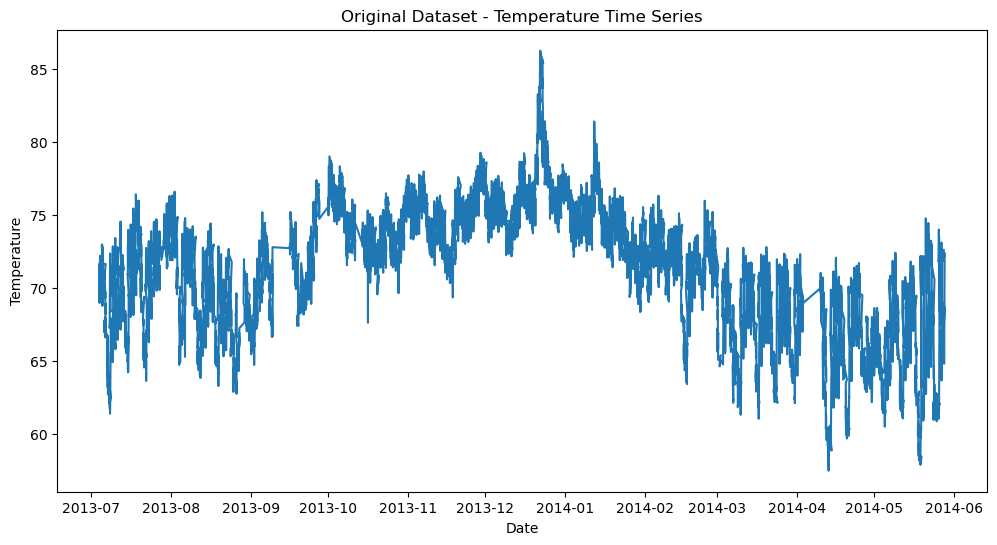

In [8]:
# Visualize the temperature time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'])
plt.title('Original Dataset - Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


In [9]:
# Add dayofweek and hour columns
df['dayofweek'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour

df.head()

# Define the function to categorize day and night
def categorize_time(row):
    if 7 <= row['hour'] < 19:  # Day
        if row['dayofweek'] < 5:  # Weekday
            return 'Weekday Day'
        else:  # Weekend
            return 'Weekend Day'
    else:  # Night
        if row['dayofweek'] < 5:  # Weekday
            return 'Weekday Night'
        else:  # Weekend
            return 'Weekend Night'


In [10]:
# Apply the function to create the 'dtcat' column
df['dtcat'] = df.apply(categorize_time, axis=1)

# Print the value counts of the 'dtcat' column
print(df['dtcat'].value_counts())


dtcat
Weekday Night    5243
Weekend Night    2024
Name: count, dtype: int64


In [11]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['value', 'dayofweek', 'hour']])


C:\Users\indra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\indra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\indra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\indra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

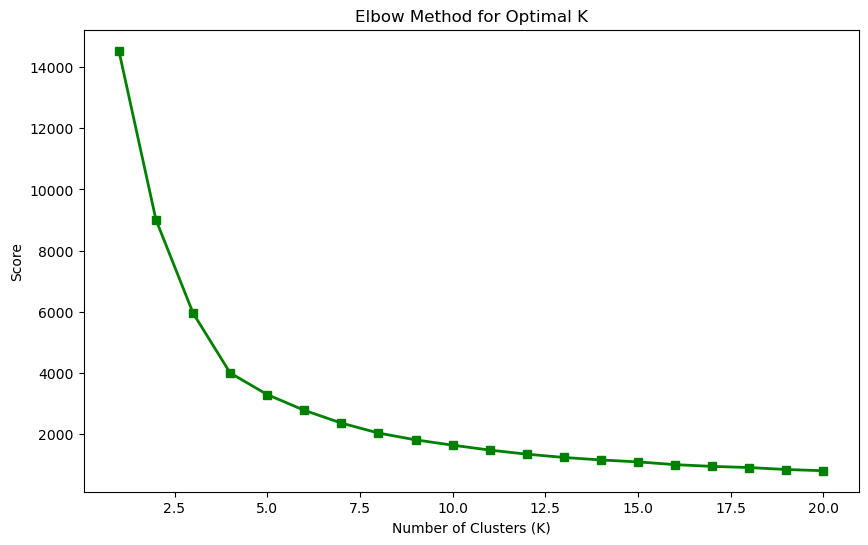

In [12]:
# Determine the optimal value of K
scores = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    scores.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), scores, marker='s', linestyle='-', color='green', linewidth=2)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.show()


C:\Users\indra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


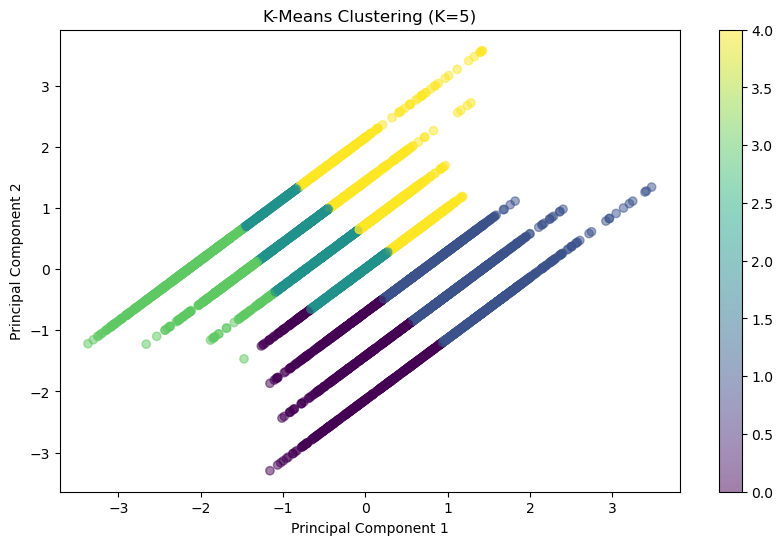

In [13]:
# Choose the best value of K (e.g., from the elbow plot, let's say K=5)
best_k = 5

# Apply K-Means clustering with the chosen K
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(scaled_data)

# Apply PCA to visualize clusters in 2D
pca = PCA(n_components=2)
pca.fit(scaled_data)
reduced_data = pca.transform(scaled_data)

# Plot clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering (K=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


C:\Users\indra\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


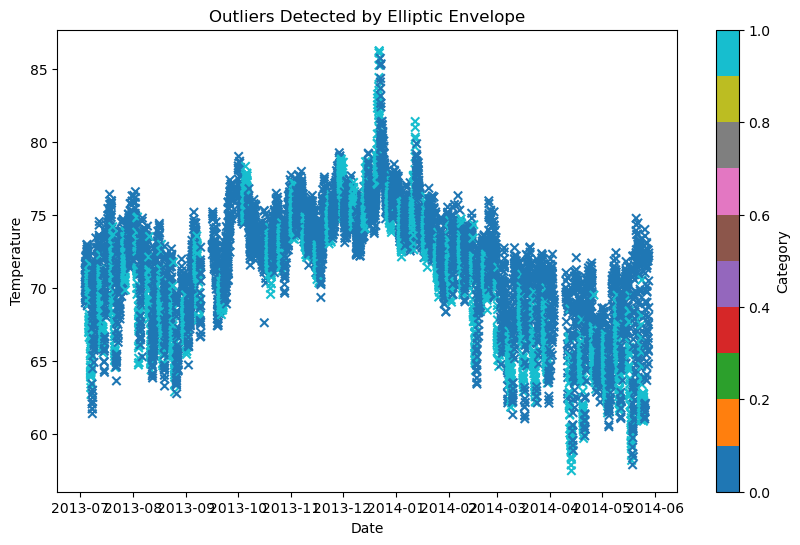

In [14]:
# Define the outliers fraction
outliers_fraction = 0.01

# Apply the Gaussian distribution (EllipticEnvelope) algorithm
envelope = EllipticEnvelope(contamination=outliers_fraction)
envelope.fit(scaled_data)
outliers_gaussian = envelope.predict(scaled_data)
outliers_gaussian = outliers_gaussian == -1

# Visualize outliers detected by EllipticEnvelope
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['value'], c=df['dtcat'].astype('category').cat.codes, cmap='tab10', marker='x')
plt.title('Outliers Detected by Elliptic Envelope')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.colorbar(label='Category')
plt.show()


In [15]:
# Assign anomalies_gaussian based on the detected outliers
anomalies_gaussian = df[outliers_gaussian]

print("Number of anomalies detected by Elliptic Envelope:", len(anomalies_gaussian))


Number of anomalies detected by Elliptic Envelope: 73


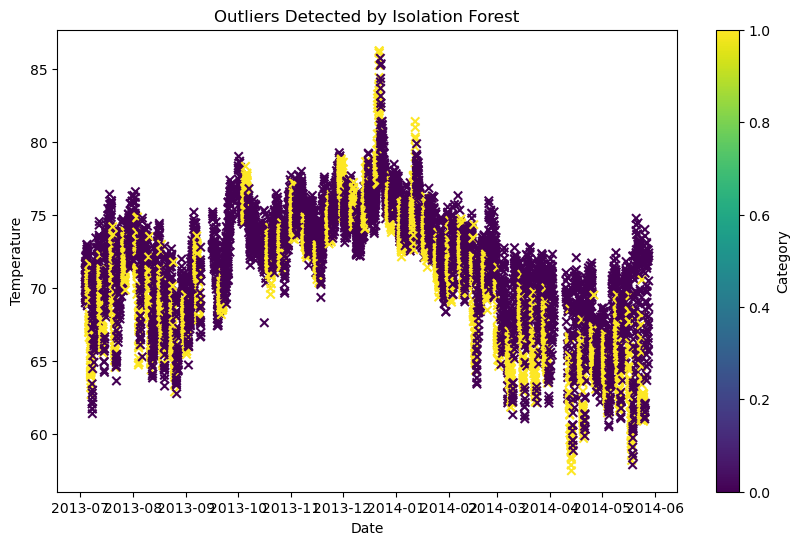

In [16]:
# Apply the Isolation Forest algorithm
forest = IsolationForest(contamination=outliers_fraction, random_state=42)
forest.fit(scaled_data)
outliers_iforest = forest.predict(scaled_data)
outliers_iforest = outliers_iforest == -1

# Visualize outliers detected by Isolation Forest with different colors for each category
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['value'], c=df['dtcat'].astype('category').cat.codes, cmap='viridis', marker='x')
plt.title('Outliers Detected by Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.colorbar(label='Category')
plt.show()

In [17]:
# Assign anomalies_iforest based on the detected outliers
anomalies_iforest = df[outliers_iforest]

print("Number of anomalies detected by Isolation Forest:", len(anomalies_iforest))

# Compare the performance of Elliptic Envelope and Isolation Forest
print("Elliptic Envelope:", anomalies_gaussian)
print("Isolation Forest:", anomalies_iforest)


Number of anomalies detected by Isolation Forest: 71
Elliptic Envelope:                             timestamp      value       date         time  \
datetime                                                                   
2013-12-22 12:00:00   12/22/2013 0:00  82.736802 2013-12-22  12:00:00 AM   
2013-12-22 01:00:00   12/22/2013 1:00  83.780995 2013-12-22   1:00:00 AM   
2013-12-22 02:00:00   12/22/2013 2:00  83.008634 2013-12-22   2:00:00 AM   
2013-12-22 03:00:00   12/22/2013 3:00  82.815627 2013-12-22   3:00:00 AM   
2013-12-22 04:00:00  12/22/2013 16:00  83.511630 2013-12-22   4:00:00 PM   
...                               ...        ...        ...          ...   
2014-05-19 04:00:00    5/19/2014 4:00  60.490925 2014-05-19   4:00:00 AM   
2014-05-19 05:00:00    5/19/2014 5:00  59.711858 2014-05-19   5:00:00 AM   
2014-05-19 06:00:00    5/19/2014 6:00  60.375894 2014-05-19   6:00:00 AM   
2014-05-19 07:00:00    5/19/2014 7:00  60.171092 2014-05-19   7:00:00 AM   
2014-05-19 08:00